In [0]:
import numpy as np
import tensorflow as tf

In [0]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.cifar100.load_data()

[66]


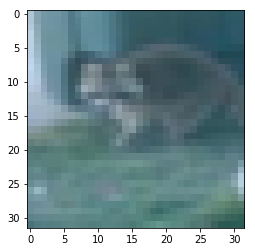

In [3]:
#select random image from dataset to visualise the feature maps
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 334
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
#plt.savefig('plot.png')

In [0]:

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
input_shape = (32, 32, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5,5), input_shape=input_shape, activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(1024, activation=tf.nn.relu))
model.add(Dense(100,activation=tf.nn.softmax))

Using TensorFlow backend.


In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [7]:
model.fit(x_train,y_train, epochs=10, batch_size=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





50000/50000 [==============================] - 8s 157us/step - loss: 3.6763 - acc: 0.1460
Epoch 2/10
50000/50000 [==============================] - 6s 121us/step - loss: 2.9669 - acc: 0.2712
Epoch 3/10
50000/50000 [==============================] - 6s 120us/step - loss: 2.6434 - acc: 0.3354
Epoch 4/10
50000/50000 [==============================] - 6s 120us/step - loss: 2.4009 - acc: 0.3868
Epoch 5/10
50000/50000 [==============================] - 6s 120us/step - loss: 2.1743 - acc: 0.4351
Epoch 6/10
50000/50000 [==============================] - 6s 119us/step - loss: 1.9640 - acc: 0.4820
Epoch 7/10
50000/50000 [==============================] - 6s 119us/step - loss: 1.7498 - acc: 0.5303
Epoch 8/10
50000/50000 [==============================] - 6s 119us/step - loss: 1.5464 - acc: 0.5779
Epoch 9/10
50000/50000 [==============================] - 6s 118us/step - loss: 1.3380 - a

In [8]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 113us/step


In [9]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.958984965515137
Test accuracy: 0.3737


In [10]:

pred = model.predict(x_test)

for i in range(1000,9000, 1000):
    print("Predicted: " , np.argmax(np.round(pred[i])))
    print("Actual: " , y_test[i])
    

Predicted:  86
Actual:  [65]
Predicted:  83
Actual:  [92]
Predicted:  0
Actual:  [38]
Predicted:  71
Actual:  [71]
Predicted:  56
Actual:  [56]
Predicted:  0
Actual:  [31]
Predicted:  35
Actual:  [35]
Predicted:  6
Actual:  [79]


(32, 32, 3)
86


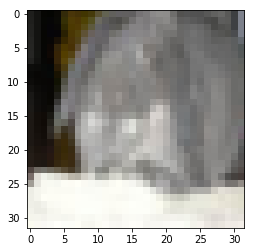

In [11]:
image_index = 1000
plt.imshow(x_test[image_index].reshape(32,32,3))
plt.savefig('plot.png')
print(x_test[image_index].shape)
pred = model.predict(x_test[image_index].reshape(1, 32, 32, 3))
print(pred.argmax())

                    

In [12]:
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_1 (3, 3, 3, 32)
conv2d_2 (5, 5, 32, 32)


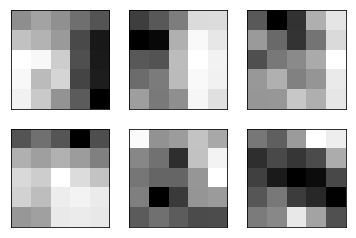

In [17]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[2].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 2, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [18]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_1 (?, 30, 30, 32)
2 conv2d_2 (?, 11, 11, 32)


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


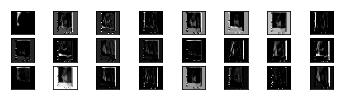

In [22]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from numpy import expand_dims
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
img = load_img('plot.png', target_size=(32,32,3))
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
square = 8
ix = 1
for _ in range(3):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()